# Shopify's Data Science Intern Challenge, Brandon Law 2022

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?

## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [23]:
df.sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


In [58]:
df.total_items.value_counts().sort_index()

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

In [39]:
df.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

In [20]:
print('Total Item Measures:')
print('Median:', df['total_items'].median())
print('Mode:', df['total_items'].mode())
print('Mean:', df['total_items'].mean())

Total Item Measures:
Median: 2.0
Mode: 0    2
dtype: int64
Mean: 8.7872


In [21]:
print('Order Amount Measures:')
print('Median:', df['order_amount'].median())
print('Mode:', df['order_amount'].mode())
print('Mean:', df['order_amount'].mean())

Order Amount Measures:
Median: 284.0
Mode: 0    153
dtype: int64
Mean: 3145.128


- There is skew in the data for order amount, so it impacts mean because it will skew the average higher.
- Order and Item Amount by payment_method ?
- Payment Method analysis
- Find normal distribution

<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

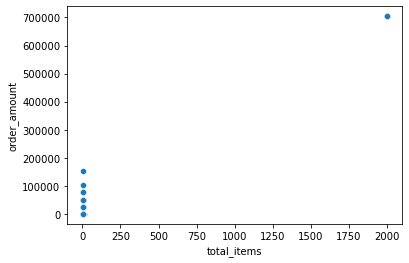

In [24]:
sns.scatterplot(data=df, x="total_items", y="order_amount")

<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

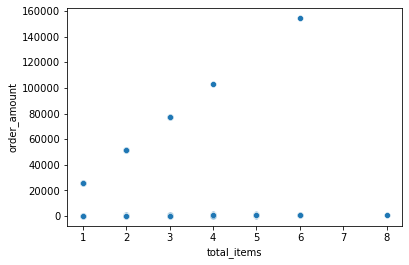

In [29]:
exclude_outlier = df[df['total_items'] < 2000]
sns.scatterplot(data=exclude_outlier, x="total_items", y="order_amount")

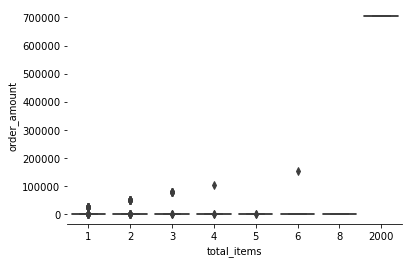

In [40]:
sns.boxplot(data=df, x="total_items", y="order_amount")
sns.despine(left=True)

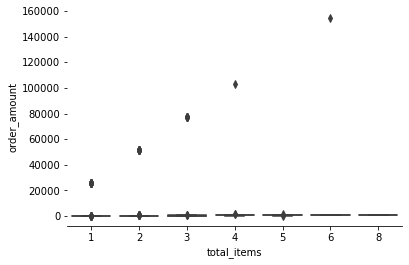

In [41]:
sns.boxplot(data=exclude_outlier, x="total_items", y="order_amount")
sns.despine(left=True)

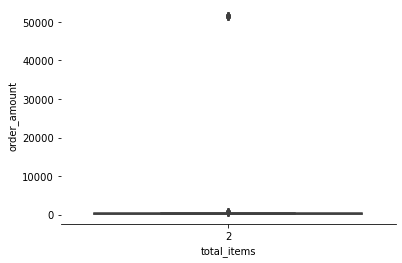

In [42]:
just_2 = df[df['total_items'] == 2]
sns.boxplot(data=just_2, x="total_items", y="order_amount")
sns.despine(left=True)